In [221]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re 
import seaborn as sns
from scipy.stats import stats, shapiro
from sklearn.linear_model import LinearRegression


In [173]:
#leser dataset
df = pd.read_csv(
    r'C:\Users\alami\DataMining\datasett_oppgave2.csv')

In [175]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [177]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [213]:

for column in df.columns:
    if df[column].isnull().any():
        #her sjekker jeg om data type er numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # fyller NaN verdier med gjennomsnitt for numeriske kolonner
            df[column] = df[column].fillna(df[column].mean())
        else:
            #bruker mode for å fylle NaN verdier
            df[column] = df[column].fillna(df[column].mode()[0]) 

print("\nDataFrame etter fylling NaN: \n \n",df)




DataFrame etter fylling NaN: 
 
       id  age        dataset    trestbps   chol  fbs      thalch  exang  \
0      1   63      Cleveland  145.000000  233.0    1  150.000000      0   
1      2   67      Cleveland  160.000000  286.0    0  108.000000      1   
2      3   67      Cleveland  120.000000  229.0    0  129.000000      1   
3      4   37      Cleveland  130.000000  250.0    0  187.000000      0   
4      5   41      Cleveland  130.000000  204.0    0  172.000000      0   
..   ...  ...            ...         ...    ...  ...         ...    ...   
915  916   54  VA Long Beach  127.000000  333.0    1  154.000000      0   
916  917   62  VA Long Beach  132.132404  139.0    0  137.545665      0   
917  918   55  VA Long Beach  122.000000  223.0    1  100.000000      0   
918  919   58  VA Long Beach  132.132404  385.0    1  137.545665      0   
919  920   62  VA Long Beach  120.000000  254.0    0   93.000000      1   

      oldpeak  num  ...  restecg_normal  restecg_st-t abnormality

In [181]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [183]:
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

In [185]:

df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)
df.head(10)


,id,age,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,num,...,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,ca_0.6763754045307443,ca_1.0,ca_2.0,ca_3.0,thal_normal,thal_reversable defect
0,1,63,Cleveland,145.0,233.0,1,150.0,0,2.3,0,...,False,False,False,False,False,False,False,False,False,False
1,2,67,Cleveland,160.0,286.0,0,108.0,1,1.5,2,...,False,False,True,False,False,False,False,True,True,False
2,3,67,Cleveland,120.0,229.0,0,129.0,1,2.6,1,...,False,False,True,False,False,False,True,False,False,True
3,4,37,Cleveland,130.0,250.0,0,187.0,0,3.5,0,...,True,False,False,False,False,False,False,False,True,False
4,5,41,Cleveland,130.0,204.0,0,172.0,0,1.4,0,...,False,False,False,True,False,False,False,False,True,False
5,6,56,Cleveland,120.0,236.0,0,178.0,0,0.8,0,...,True,False,False,True,False,False,False,False,True,False
6,7,62,Cleveland,140.0,268.0,0,160.0,0,3.6,3,...,False,False,False,False,False,False,True,False,True,False
7,8,57,Cleveland,120.0,354.0,0,163.0,1,0.6,0,...,True,False,False,True,False,False,False,False,True,False
8,9,63,Cleveland,130.0,254.0,0,147.0,0,1.4,2,...,False,False,True,False,False,True,False,False,False,True
9,10,53,Cleveland,140.0,203.0,1,155.0,1,3.1,1,...,False,False,False,False,False,False,False,False,False,True


In [187]:
#sjekker om kolonner er i samme lengde.
df1 = df.drop(columns=['dataset'])
df1
df1.count()

id                          920
age                         920
trestbps                    920
chol                        920
fbs                         920
thalch                      920
exang                       920
oldpeak                     920
num                         920
sex_Male                    920
cp_atypical angina          920
cp_non-anginal              920
cp_typical angina           920
restecg_normal              920
restecg_st-t abnormality    920
slope_flat                  920
slope_upsloping             920
ca_0.6763754045307443       920
ca_1.0                      920
ca_2.0                      920
ca_3.0                      920
thal_normal                 920
thal_reversable defect      920
dtype: int64

In [97]:
#Her endrer jeg navnet til kolonnen fra male_sex til sex. 
#df = df.rename(columns={'sex_Male': 'sex'})
#df

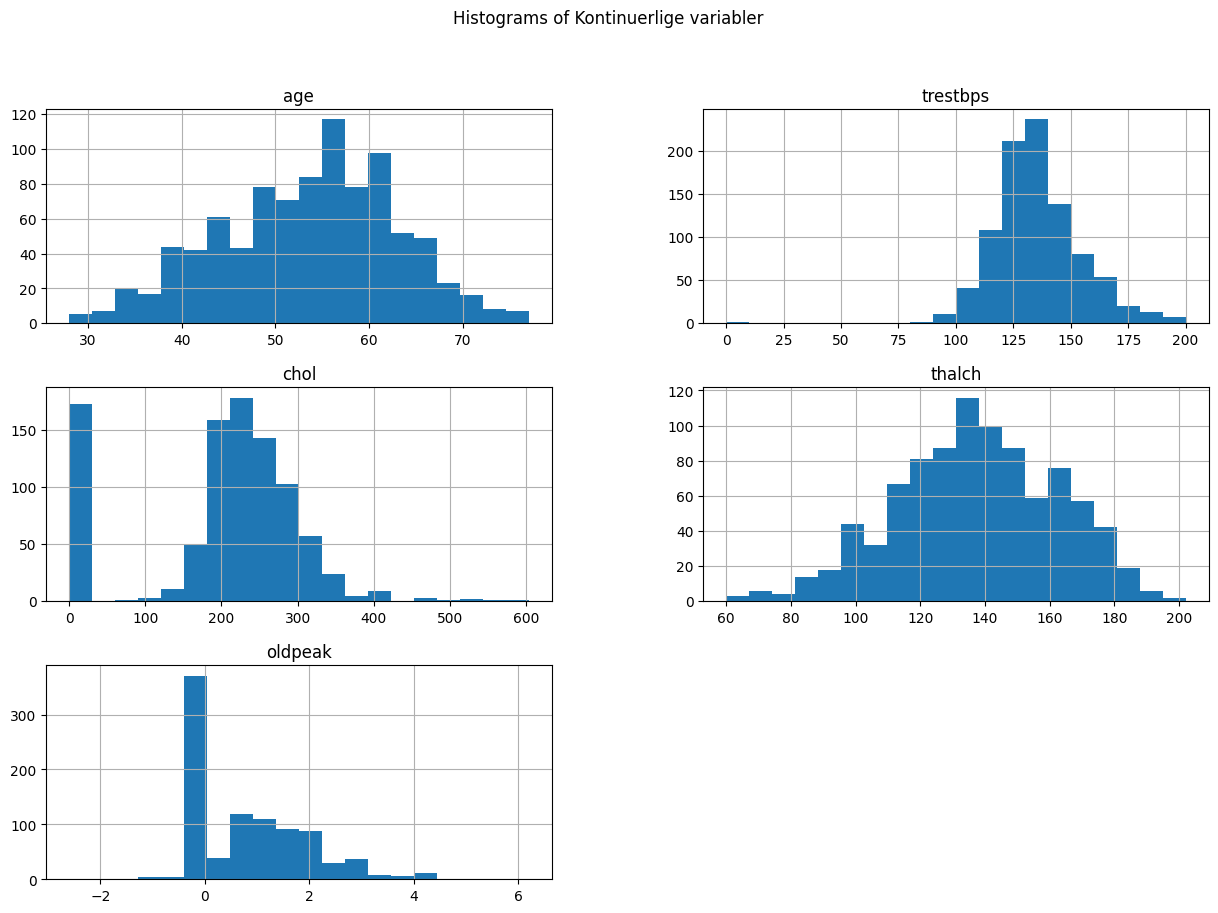

,age,trestbps,chol,thalch,oldpeak
mean,53.510870,132.132404,199.130337,137.545665,0.878788
median,54.000000,130.000000,221.000000,138.000000,0.800000
std,9.424685,18.443895,108.957634,25.138494,1.053774


In [189]:
# Plot histograms for kontinuerlige variablene
kontinuerlig_variabler = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

df[kontinuerlig_variabler].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Kontinuerlige variabler')
plt.show()

# beregn gjennomsnitt, median, og standardaviks
# Bruker vi agg funksjonen for å regne ut gjennomsnitt, median og std
desc_stats = df[kontinuerlig_variabler].agg(['mean', 'median', 'std'])
desc_stats

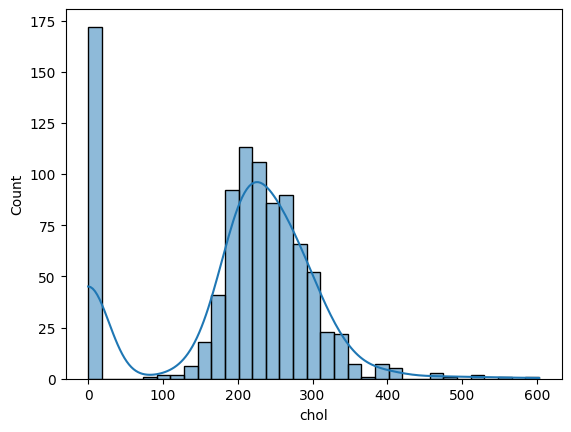

Statistics=0.8663261846550022, p-value=2.75620063310323e-27
Kolesterol er ikke normalfordelt. 


In [217]:
sns.histplot(df['chol'], kde=True)
plt.title('')
plt.show()

#Her bruker vi shapiro-wilk test
stat, p = shapiro(df['chol'])
print(f'Statistics={stat}, p-value={p}')
#Sjekker, dersom p_value er mindre enn 0.05

if p < 0.05:
    print("Kolesterol er ikke normalfordelt. ")
else:
    print("Normalfordelt")

In [193]:
df.head()

,id,age,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,num,...,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,ca_0.6763754045307443,ca_1.0,ca_2.0,ca_3.0,thal_normal,thal_reversable defect
0,1,63,Cleveland,145.0,233.0,1,150.0,0,2.3,0,...,False,False,False,False,False,False,False,False,False,False
1,2,67,Cleveland,160.0,286.0,0,108.0,1,1.5,2,...,False,False,True,False,False,False,False,True,True,False
2,3,67,Cleveland,120.0,229.0,0,129.0,1,2.6,1,...,False,False,True,False,False,False,True,False,False,True
3,4,37,Cleveland,130.0,250.0,0,187.0,0,3.5,0,...,True,False,False,False,False,False,False,False,True,False
4,5,41,Cleveland,130.0,204.0,0,172.0,0,1.4,0,...,False,False,False,True,False,False,False,False,True,False


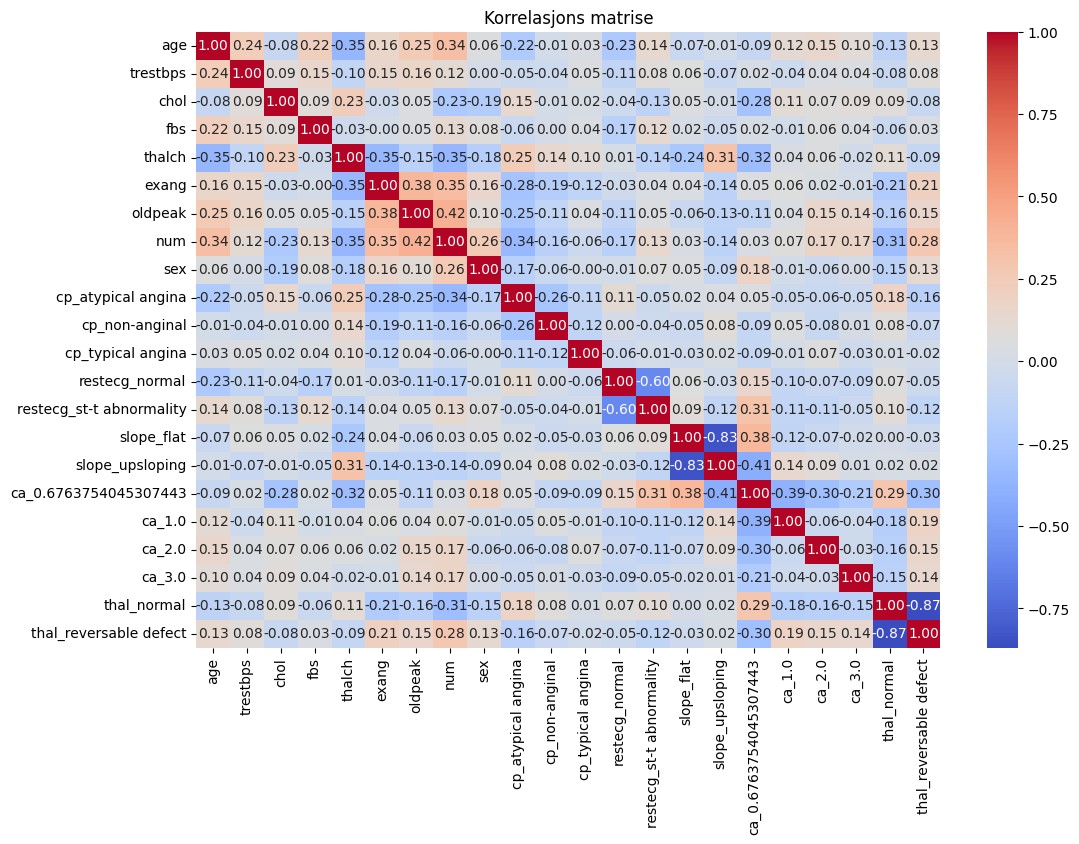

In [195]:
#fjerner pasient id
rename_sex = df.rename( columns ={'sex_Male': 'sex'})
df_id = df.drop(columns=['id','dataset']).rename(columns={'sex_Male': 'sex'})
df_id
corr_df = df_id.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korrelasjons matrise')
plt.show()


In [199]:
df1= df.rename(columns = {'sex_Male': 'sex'})
df1.count()

id                          920
age                         920
dataset                     920
trestbps                    920
chol                        920
fbs                         920
thalch                      920
exang                       920
oldpeak                     920
num                         920
sex                         920
cp_atypical angina          920
cp_non-anginal              920
cp_typical angina           920
restecg_normal              920
restecg_st-t abnormality    920
slope_flat                  920
slope_upsloping             920
ca_0.6763754045307443       920
ca_1.0                      920
ca_2.0                      920
ca_3.0                      920
thal_normal                 920
thal_reversable defect      920
dtype: int64

In [201]:
from scipy.stats import ttest_ind

female = df1[df1['sex'] == 0]['chol']
male = df1[df1['sex'] == 1]['chol']

t_stat, p_value = ttest_ind(male, female, alternative='greater') 
print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')
if p_value < 0.05:
    print("Det er signifikant forskjell i kolesterol mello menn og kvinner")
else:
    print("ingen signifikant forskjell")


t-statistic: -5.984758803132448
p-value: 0.9999999984477581
ingen signifikant forskjell


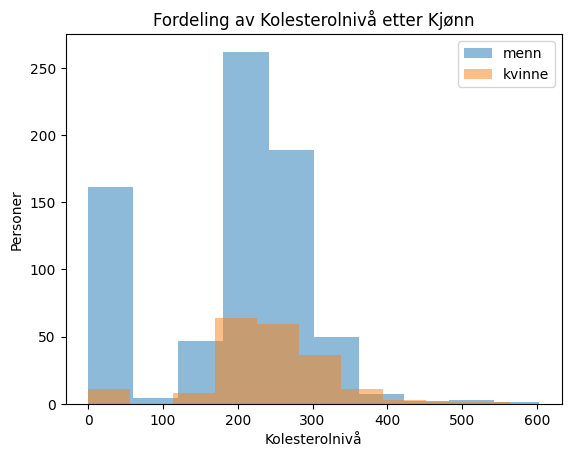

In [203]:
plt.hist(male, alpha = 0.5, label='menn', bins = 10)
plt.hist(female, alpha = 0.5, label='kvinne', bins = 10)
plt.xlabel('Kolesterolnivå')
plt.ylabel('Personer')
plt.title("Fordeling av Kolesterolnivå etter Kjønn")
plt.legend(loc="upper right")
plt.show()

In [205]:
df.head()

,id,age,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,num,...,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,ca_0.6763754045307443,ca_1.0,ca_2.0,ca_3.0,thal_normal,thal_reversable defect
0,1,63,Cleveland,145.0,233.0,1,150.0,0,2.3,0,...,False,False,False,False,False,False,False,False,False,False
1,2,67,Cleveland,160.0,286.0,0,108.0,1,1.5,2,...,False,False,True,False,False,False,False,True,True,False
2,3,67,Cleveland,120.0,229.0,0,129.0,1,2.6,1,...,False,False,True,False,False,False,True,False,False,True
3,4,37,Cleveland,130.0,250.0,0,187.0,0,3.5,0,...,True,False,False,False,False,False,False,False,True,False
4,5,41,Cleveland,130.0,204.0,0,172.0,0,1.4,0,...,False,False,False,True,False,False,False,False,True,False


In [207]:
# kontingstabell
kon_tabel = pd.crosstab(df['exang'], df['num'])

# Chi-square test, testen som om det er en signifikant sammenheng mellom to kategoriske variabler
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(kon_tabel)
print(f'Chi-squared: {chi2}, p-value: {p}')

if p < 0.05:
    print("Signifikant sammenheng mellom anstrengelseutløst angina og hjertesykdomsdiagnose")
else:
    print("Ingen signifikant sammenheng")


Chi-squared: 174.18867363067724, p-value: 1.3193441828978815e-36
Signifikant sammenheng mellom anstrengelseutløst angina og hjertesykdomsdiagnose


R² score: 0.022389062808403137


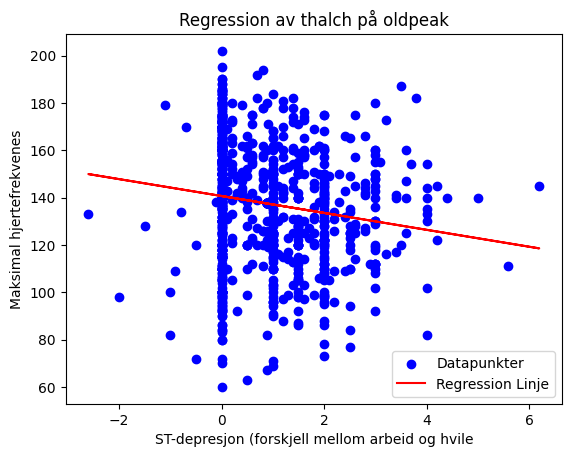

In [225]:

# definere x og y
x = df[['oldpeak']]
y = df['thalch']

model = LinearRegression()
model.fit(x, y)

# Prediksjon
y_pred = model.predict(X)

# beregn R² score
r_squared = model.score(x, y)
print(f'R² score: {r_squared}')

# Plotting regresjonslinjen
plt.scatter(x, y, color='blue', label='Datapunkter')
plt.plot(x, y_pred, color='red', label='Regression Linje')
plt.title('Regression av thalch på oldpeak')
plt.xlabel('ST-depresjon (forskjell mellom arbeid og hvile')
plt.ylabel('Maksimal hjertefrekvenes')
plt.legend()
plt.show()
